In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [8]:
import seaborn as sns

In [9]:
df=pd.read_csv("Suicide.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [11]:
df.country.value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [12]:
df.age.value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'suicides_no'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'suicides/100k pop'}>],
       [<AxesSubplot:title={'center':'HDI for year'}>,
        <AxesSubplot:title={'center':'gdp_per_capita ($)'}>]],
      dtype=object)

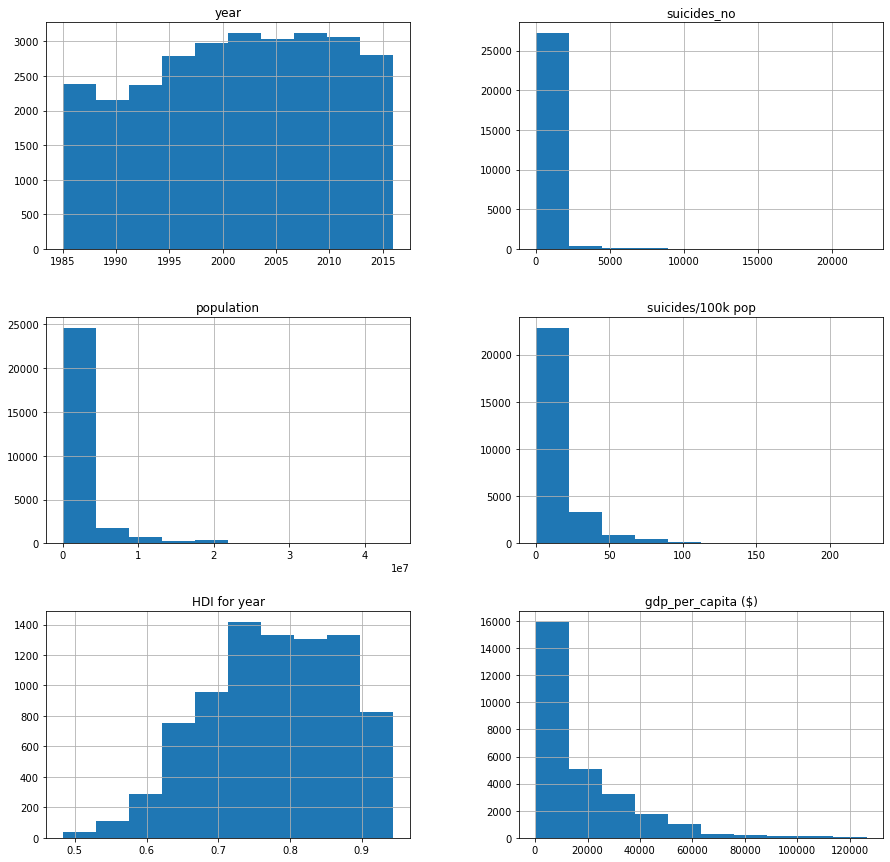

In [13]:
df.hist(figsize=(15,15))

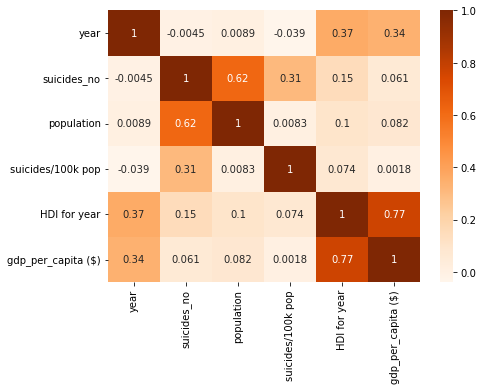

In [14]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='Oranges')
plt.show()


/Users/musubimanagement/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


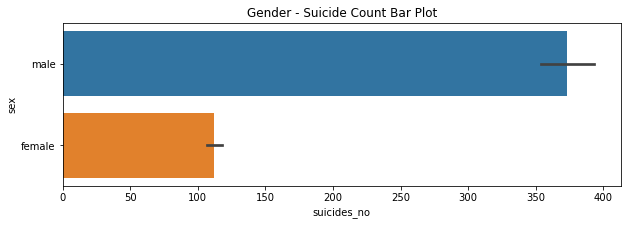

In [15]:
plt.figure(figsize=(10,3))
sns.barplot(df.suicides_no,df.sex)
plt.title('Gender - Suicide Count Bar Plot')
plt.show()

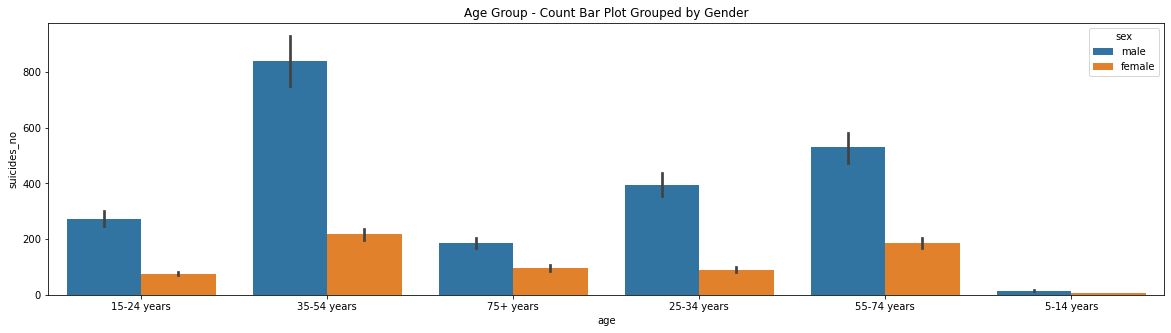

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(x = "age", y = "suicides_no", hue = "sex", data = df)
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()

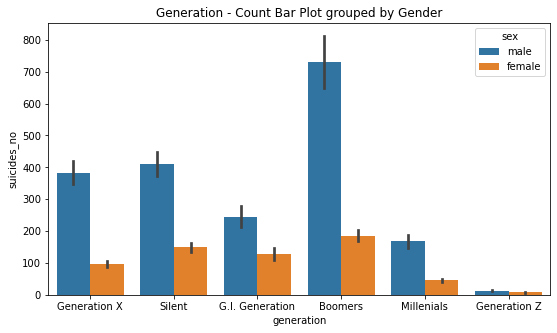

In [17]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicides_no", hue = "sex", data = df)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

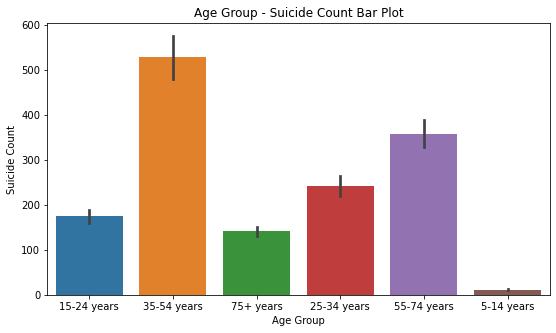

In [18]:
# Age Group and Suicide count bar plot

plt.figure(figsize=(9,5))
sns.barplot(x=df['age'], y=df['suicides_no'])
plt.xlabel('Age Group')
plt.ylabel('Suicide Count')
plt.title('Age Group - Suicide Count Bar Plot')
plt.show()


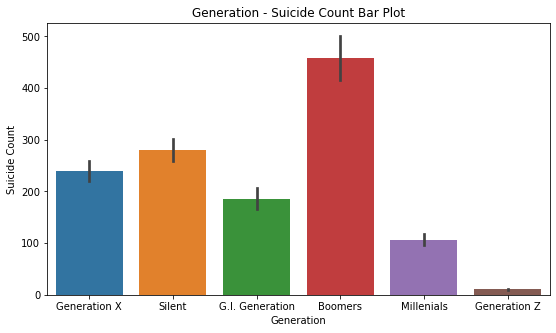

In [19]:
#Generation & Suicide Count Bar Plot

plt.figure(figsize=(9,5))
sns.barplot(x=df['generation'], y=df['suicides_no'])
plt.xlabel('Generation')
plt.ylabel('Suicide Count')
plt.title('Generation - Suicide Count Bar Plot')
plt.show()

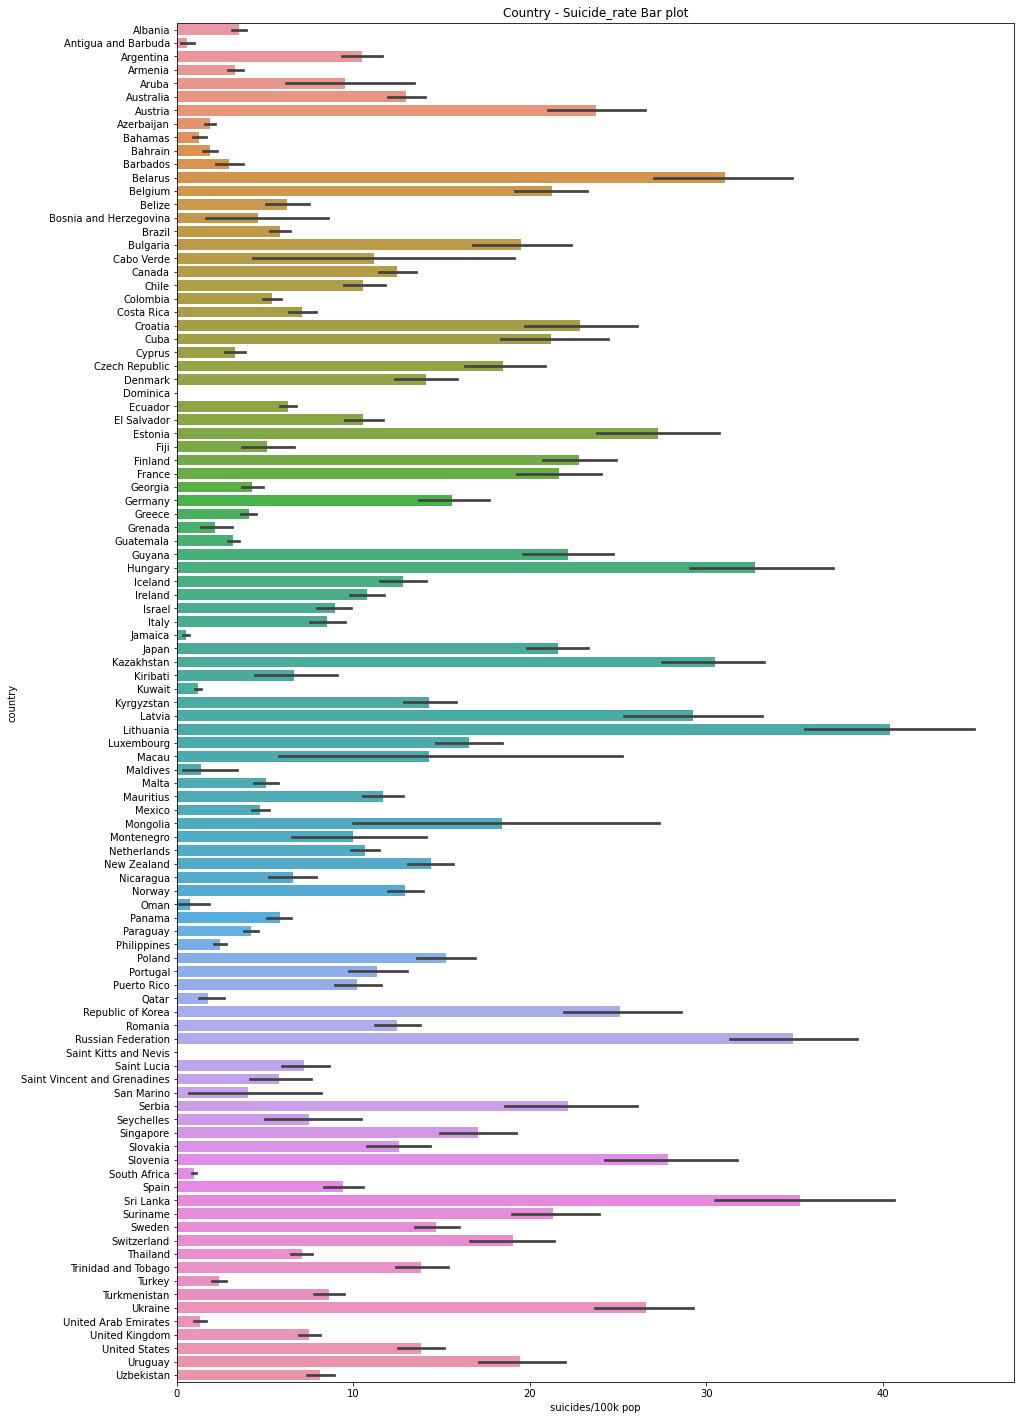

In [20]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicides/100k pop", y = "country", data = df)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

<AxesSubplot:xlabel='year'>

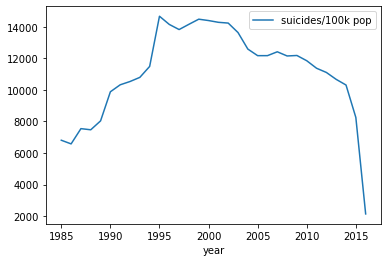

In [21]:
df[['year','suicides/100k pop']].groupby(['year']).sum().plot()

Data Preprocessing & EDA

In [22]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [23]:
df.drop(['HDI for year'],axis=1,inplace=True)

In [24]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [25]:
df.drop(['country-year'],axis=1,inplace=True)

In [26]:
#droppinf off any null rows (is any)

df = df.dropna()
df.shape

(27820, 10)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.3+ MB


In [28]:
#encoding the categorical features with LabelEncoder

from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age', 'sex', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    df[column] = le.fit_transform(df[column])

In [29]:
#creating a copy of dataset for statistical test

stat_data = df.copy()
stat_data

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,3620833,2.96,"63,067,077,179",2309,2
27816,100,29,0,5,9,348465,2.58,"63,067,077,179",2309,5
27817,100,29,1,3,60,2762158,2.17,"63,067,077,179",2309,3
27818,100,29,0,3,44,2631600,1.67,"63,067,077,179",2309,3


In [30]:
df.columns.values[7]="gdp_for_year"

In [31]:
df=df.rename(columns={df.columns[7]:'gdp_year'})

In [32]:
# Converting the column 'gdp_for_year' to float from object
df['gdp_year'] = df['gdp_year'].str.replace(',','').astype(float)

In [33]:
#Splitting the Data
X=df.drop('suicides/100k pop',axis=1)
y=df['suicides/100k pop']

In [34]:
#Applying Min Max Scaler

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [36]:
#applying Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
X_train.shape

(22256, 9)

In [38]:
X_test.shape

(5564, 9)

In [39]:
y_train.shape

(22256,)

# Random FOrest Regressor 

In [40]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

pred = model.predict(X_test)

In [41]:
from sklearn.metrics import r2_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,pred))
print(f'root mean squared error {rmse}')
print("Accuracy: ", model.score(X_test,y_test))
print('r2_score',r2_score(y_test,pred))

root mean squared error 1.4858719199223516
Accuracy:  0.9932070047018686
r2_score 0.9932070047018686


In [42]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model,X,y,cv=5))

[0.97475434 0.98435046 0.95845783 0.86770189 0.93940028]


In [43]:
accuracies = cross_val_score(estimator = model,X = X_train,y = y_train,cv=10)
print("Accuracy(mean):%",accuracies.mean()*100)

Accuracy(mean):% 99.2765372968701


In [44]:
compare = pd.DataFrame({'y_test':y_test,'pred':pred})
compare

,y_test,pred
24516,14.79,14.6308
4778,7.29,7.2327
6443,25.01,24.7367
17587,6.15,6.1894
25102,9.20,9.4773
...,...,...
16018,7.67,7.6625
1947,20.35,20.3328
3277,19.34,19.8750
5661,8.23,8.2177
